In [1]:
import pyrosetta; pyrosetta.init()
from pyrosetta import *
init()
from pyrosetta.toolbox import pose_from_rcsb
from pyrosetta.toolbox import cleanATOM
from pyrosetta.teaching import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python312.mac 2024.35+release.45abd6ab3e15d27b06950672a1bb868f76c03266 2024-08-28T11:40:28] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python312.mac r385 2024.35+release.45abd6ab3e 45abd6ab3e15d27b

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python312.mac 2024.35+release.45abd6ab3e15d27b06950672a1bb868f76c03266 2024-08-28T11:40:28] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python312.mac r385 2024.35+release.45abd6ab3e 45abd6ab3e15d27b

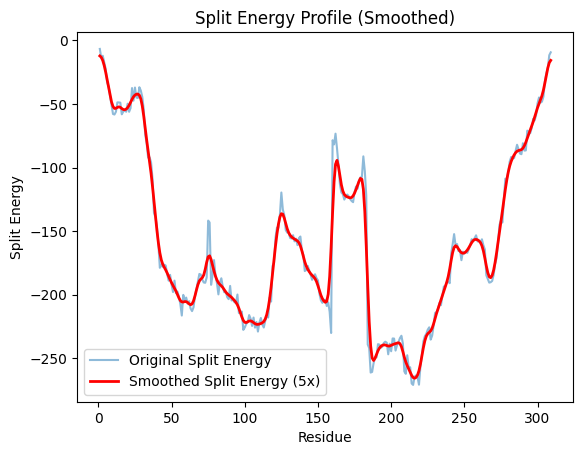

In [2]:
from split_energy import split_energy
se_ifp, se_plot_ifp = split_energy("4O8G", window = 3)

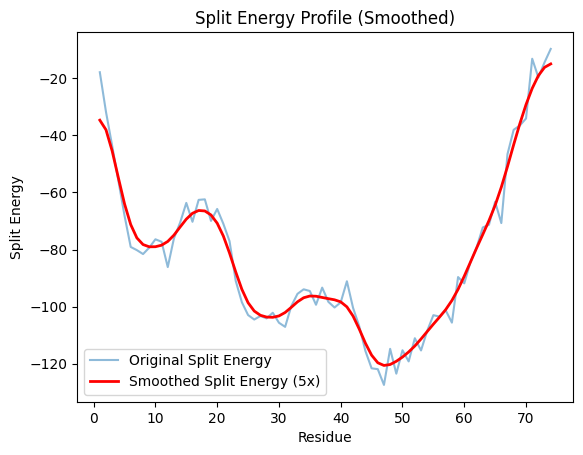

In [3]:
se_ubiquitin = split_energy("1UBQ", window = 3)[0]

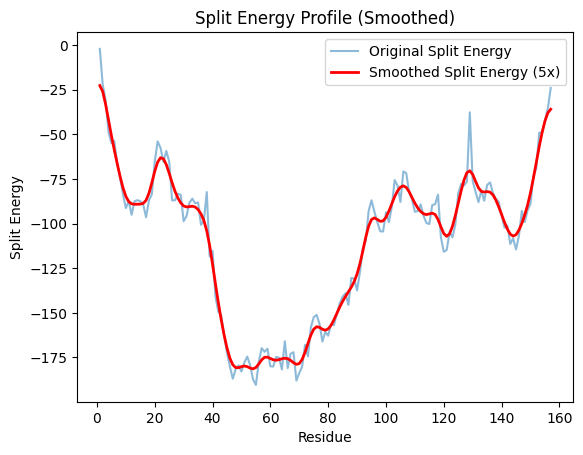

In [6]:
se_dhfr = split_energy("1RX2", window = 3)[0]

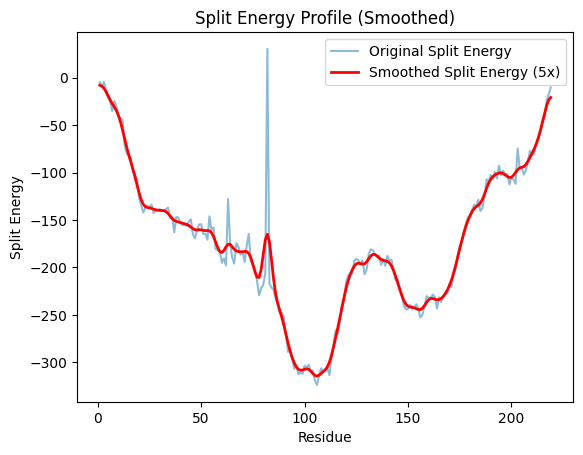

In [8]:
se_gfp = split_energy("1EMA", window = 3)[0]